Valores nulos:
N_empresas                     345
Renta_disponible_media         345
Tasa_paro                        0
Densidad_población               0
Transacciones_inmobiliarias      0
Deuda_ayuntamientos              0
Saldo_migratorio                 0
dtype: int64
[[ 1.  2.]
 [ 6. 12.]
 [ 3.  6.]]
[[ 2.99210714e+00  2.03232757e+04  2.87200000e+01 ...  2.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.78473533e+01  2.03232817e+04  2.38900000e+01 ...  7.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [-3.00645823e+01  2.03232678e+04  1.00000000e+02 ...  4.00000000e+00
   0.00000000e+00  6.00000000e+00]
 ...
 [ 5.00000000e+01  2.31970000e+04  4.16400000e+01 ...  2.20000000e+01
   1.17000000e+02  2.10000000e+01]
 [ 6.23424182e+01  2.03232947e+04  2.83200000e+01 ...  3.90000000e+01
   0.00000000e+00  2.00000000e+01]
 [ 4.75264713e+00  2.03232772e+04  3.36700000e+01 ...  5.00000000e+00
   0.00000000e+00 -2.00000000e+00]]
Muestra de base de datos estandarizada:
[[-0.09864522 -0.

Matplotlib is building the font cache; this may take a moment.


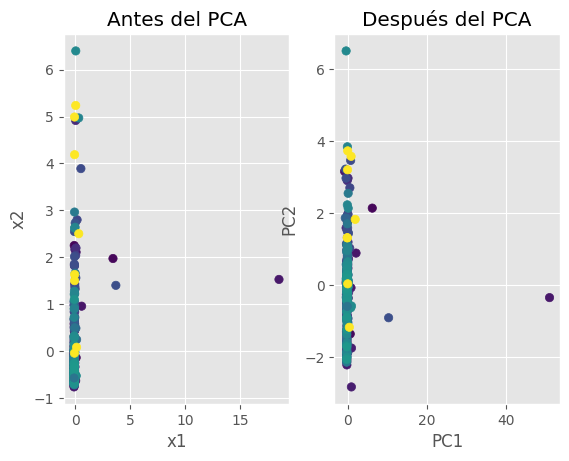

Varianza explicada por el PCA:
[7.47932933 1.20439991]
[[0.36462004 0.04594621 0.3638077  0.36364061 0.36395086 0.10397236
  0.01860131 0.36149985 0.36297913 0.35959662 0.25492828]
 [0.02031918 0.72539554 0.02060519 0.01205081 0.02559256 0.29721325
  0.59662565 0.02518334 0.03763759 0.01652575 0.15981833]]


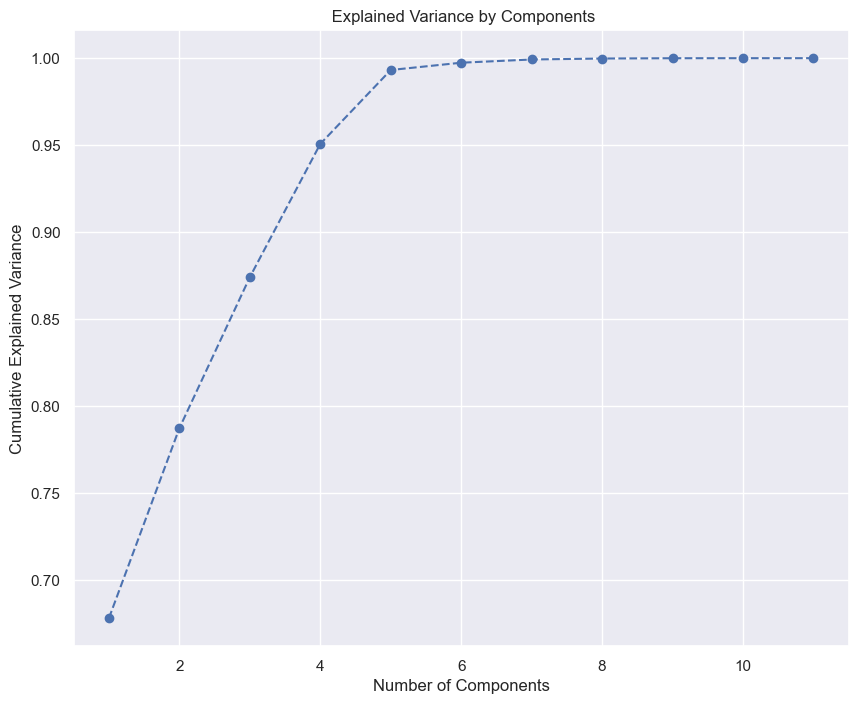

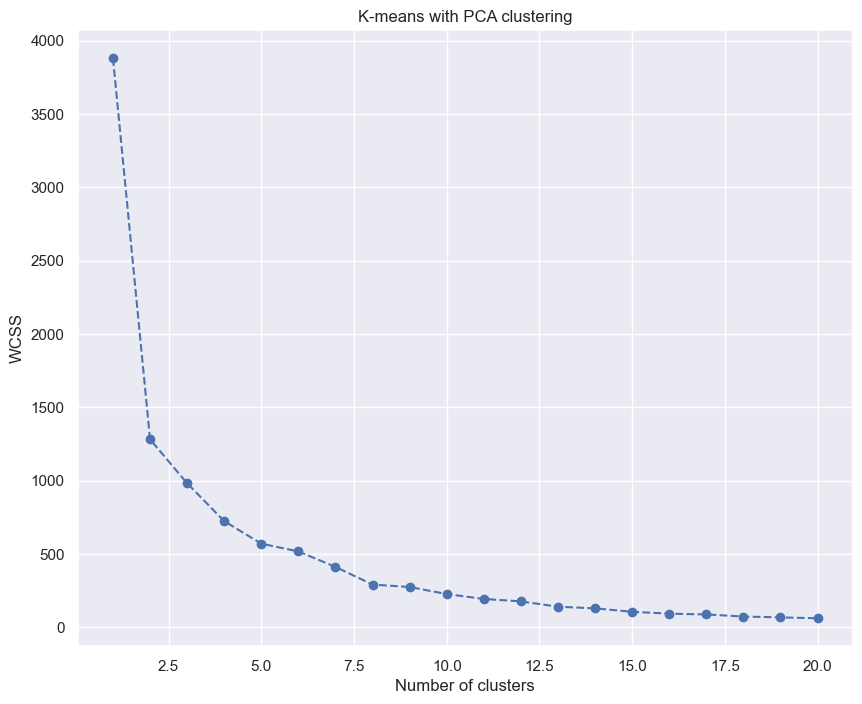

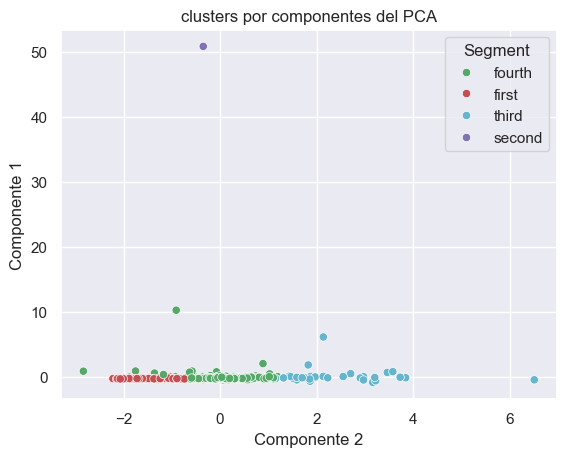

[[-0.28499197 -1.46820965 -0.89164332  0.86310737]
 [50.89125094 -0.34862309 -0.90371654 -0.43505169]
 [ 0.13067432  2.42247961 -0.78450921  1.15347147]
 [-0.13332117  0.07254086  0.31197232 -0.34353354]]
Segmentofirst: ['AGUAS CANDIDAS', 'AGUILAR DE BUREBA', 'ALCOCERO DE MOLA', 'ARAUZO DE SALCE', 'ARENILLAS DE RIOPISUERGA', 'ARRAYA DE OCA', 'BERLANGAS DE ROA', 'BERZOSA DE BUREBA', 'CAMPOLARA', 'CANTABRANA', 'CARRIAS', 'CASTRILLO MOTA DE JUDIOS', 'CILLAPERLATA', 'CONTRERAS', 'ESPINOSA DEL CAMINO', 'FRESNEDA DE LA SIERRA TIRON', 'GALLEGA, LA', 'HOYALES DE ROA', 'HUERTA DE ARRIBA', 'HURONES', 'IBRILLOS', 'JARAMILLO QUEMADO', 'MAMBRILLAS DE LARA', 'MAMOLAR', 'MANCILES', 'MONCALVILLO', 'OQUILLAS', 'PADRONES DE BUREBA', 'PALACIOS DE RIOPISUERGA', 'PIERNIGAS', 'PINILLA DE LOS BARRUECOS', 'PINILLA DE LOS MOROS', 'PUENTEDURA', 'QUINTANABUREBA', 'QUINTANAELEZ', 'QUINTANAVIDES', 'QUINTANILLA DE LA MATA', 'REDECILLA DEL CAMINO', 'REDECILLA DEL CAMPO', 'REZMONDO', 'RUCANDIO', 'SALINILLAS DE BUREBA

In [2]:
#PASOS PREVIOS
# Importamos librerías necesarias - utilizaremos pandas para llamar, leer y analizar el archivo a nivel general
import pandas as pd
# Importamos la base de datos inicial desde la carpeta local datasets
df = pd.read_csv('datasets/Monografia_final.csv')
# Llamamos a las primeras 5 filas para hacernos una idea de cómo interpreta de primeras la base de datos
# Observamos que las celdas nulas las interpreta como: NaN (not a number)
df.head()
# IMPUTACIÓN DE DATOS FALTANTES
import numpy as np
import sklearn

# Detectamos valores nulos
valores_nulos = df[['N_empresas', 'Renta_disponible_media', 'Tasa_paro', 'Densidad_población', 'Transacciones_inmobiliarias', 'Deuda_ayuntamientos', 'Saldo_migratorio']].isnull().sum()
print("Valores nulos:")
print(valores_nulos)

# Aplicamos el modelo de imputación multivariable de sklearn y lo entrenamos con una data set cualquiera reducido
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# Max iter = número de veces que repetirá el procedimiento, normalmente para una base de datos normal estará entre 10-12, cuanto más grande sea mayor será este número ya que hacen falta más interacciones para alcanzar un resultado estable.
imp = IterativeImputer(max_iter=11, random_state=0)
imp.fit([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])
X_test = [[np.nan, 2], [6, np.nan], [np.nan, 6]]
# El modelo aprende que la segunda variable es dos veces la primera
print(np.round(imp.transform(X_test)))

# Seleccionamos las columnas que van a participar en la imputación
columnas = ['N_empresas', 'Renta_disponible_media', 'Tasa_paro', 'Densidad_población', 'Transacciones_inmobiliarias', 'Deuda_ayuntamientos', 'Saldo_migratorio']

# Creamos una matriz bidemensional con los valores de estas columnas
X_train = df[columnas].values

# Ajustamos el imputador con esta matriz: será nuestro input
imp.fit(X_train)

# Transformamos los datos (sólo serán afectados los valores originalmente nulos: NaN)
datos_imputados = imp.transform(X_train)
print(datos_imputados)
# Creamos una nueva base de datos en csv con los datos modificados, conservando el resto de los originales
df['N_empresas'] = datos_imputados[:, 0]
df['Renta_disponible_media'] = datos_imputados[:, 1]
df.to_csv('datasets/datos_imputados.csv', index=True, header=True)

# Ahora en la base de datos local habría que cambiar todos los valores resultantes <0 de la columna N_empresas a =0 (ya que N_empresas no puede ser <0)

# NORMALIZACIÓN ESTÁNDAR
# Aplicaremos la estandarización a la base de datos imputada
from sklearn.preprocessing import StandardScaler
Datos_imputados = pd.read_csv('datasets/FINAL_DATOS_IMPUTADOS-2.csv')
Datos_imputados.head()
from sklearn.preprocessing import StandardScaler
Datos_imputados = pd.read_csv('datasets/FINAL_DATOS_IMPUTADOS-2.csv')

# No queremos que estas dos columnas participen por lo que las definimos en una variable y las eliminamos del dataset al que se le aplicará la estandarización/tipificación
columnas = Datos_imputados[['Municipio', 'Codigo_Postal']]
dataset = Datos_imputados.drop(['Municipio', 'Codigo_Postal'], axis=1)

# Convertimos el DataFrame a un array de NumPy
array = dataset.values

# Cambiamos la forma del array
array_reshaped = array.reshape(-1, 1)

# Convertimos el array de nuevo a un DataFrame
df_reshaped = pd.DataFrame(array_reshaped)
scaler = StandardScaler()
scaler.fit(dataset)
standardized_dataset = scaler.transform(dataset)
# Calculamos los valores de referencia para comprobar que esté bien
print("Muestra de base de datos estandarizada:")
print(standardized_dataset)
print("Media aritmética:")
print(np.mean(standardized_dataset))
print("Varianza:")
print(np.var(standardized_dataset))
print("Desviación estándar:")
print(np.std(standardized_dataset))

# Convertimos el array a un DataFrame
df_standardized = pd.DataFrame(standardized_dataset, columns=dataset.columns)

# Establecemos los nombres de las columnas del DataFrame a los valores de dataset.columns
df_standardized.columns = dataset.columns

# Concatenamos las columnas con df_standardized
df_final = pd.concat([df_standardized, columnas], axis=1)

# Guardamos el DataFrame como un archivo CSV
df_final.to_csv('datasets/standardized_dataset.csv', header=True)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

# PCA
# Importamos los datos
Standardized_dataset = pd.read_csv('datasets/standardized_dataset.csv')

# Definimos nuestras variables
columnas = ['Poblacion', 'Superficie', 'Media_paro', 'Afiliados_SS', 'N_empresas', 'Renta_disponible_media', 'Tasa_paro', 'Densidad_población', 'Transacciones_inmobiliarias', 'Deuda_ayuntamientos', 'Saldo_migratorio']

variables = Standardized_dataset[columnas].values
etiquetas = Standardized_dataset['Codigo_Postal'].values

X = variables
y = etiquetas

# Aplicamos el modelo PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
# Proyectamos los datos originales en el espacio bidimensional del PCA
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Antes del PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('Después del PCA')
plt.show()

# Vemos la varianza explicada por cada componente
print("Varianza explicada por el PCA:")
print(pca.explained_variance_)
# Vemos la nueva matriz de covarianza
np.cov(X_new.T)
# Obtenemos los componentes del PCA
print(abs( pca.components_ ))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# clusterING
# Importamos las librerías y modelos necesarios
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Importamos los datos que vamos a utilizar (el dataset estandarizado)
Standardized_dataset = pd.read_csv('datasets/standardized_dataset.csv')

columnas = ['Poblacion', 'Superficie', 'Media_paro', 'Afiliados_SS', 'N_empresas', 'Renta_disponible_media', 'Tasa_paro', 'Densidad_población', 'Transacciones_inmobiliarias', 'Deuda_ayuntamientos', 'Saldo_migratorio']

variables = Standardized_dataset[columnas].values

# Definimos y aplicamos el PCA
pca = PCA()
pca.fit(variables)
pca.explained_variance_ratio_

# Método del codo para determinar el número de componentes principales
plt.figure(figsize = (10,8))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title( ' Explained Variance by Components')
plt.xlabel( 'Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Según la gráfica obtenida, la mejor aproximación será 4
pca = PCA(n_components = 4)

# Aplicamos el PCA
pca.fit(variables)
pca.transform(variables)
scores_pca = pca.transform(variables)

# Definimos k-means clustering
wcss = []
for i in range(1,21):
  kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)

# Método del codo para determinar el número k de clusters
plt.figure(figsize = (10,8))
plt.plot(range(1,21), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA clustering')
plt.show()

# Aplicamos k-means clustering
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)

variables_clustering = Standardized_dataset[columnas]

df_segm_pca_kmeans = pd.concat([variables_clustering.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-4: ] = ['Componente 1', 'Componente 2', 'Componente 3', 'Componente 4']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

# Definimos los segmentos
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'first', 1:'second', 2:'third', 3:'fourth'})

# Representamos los resultados
sns.scatterplot(data=df_segm_pca_kmeans, x='Componente 2', y='Componente 1', hue='Segment', palette=['g', 'r', 'c', 'm'])
plt.title('clusters por componentes del PCA')
plt.show()

# Calculamos los centroides
centroides = kmeans_pca.cluster_centers_
print(centroides)

# INTERPRETACIÓN Y ANÁLISIS
# Nos aseguramos de que 'municipio' esté en df_segm_pca_kmeans
if 'Municipio' not in df_segm_pca_kmeans.columns:
  df_segm_pca_kmeans = pd.concat([Standardized_dataset['Municipio'], df_segm_pca_kmeans], axis=1)
# Agrupamos por 'Segment' y recopilamos los municipios en una lista para cada grupo
municipios_por_segmento = df_segm_pca_kmeans.groupby('Segment')['Municipio'].apply(list)
# Imprimimos los municipios para cada segmento
for segmento, municipios in municipios_por_segmento.items():
  print(f"Segmento{segmento}: {municipios}")